# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def jaccard_similarity(d1,d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [ ]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try not to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [ ]:
tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus)

print(cosine_similarity(tfidf[0],tfidf[1]))
print(cosine_similarity(tfidf[0],tfidf[2]))
print(cosine_similarity(tfidf[1],tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 45.2 MB/s 
     |████████████████████████████████| 448 kB 35.1 MB/s 


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [ ]:
raw = [x.decode() for x in raw[1:10000]]

reviews=[]
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [ ]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [ ]:
word2vec = Word2Vec(reviews,min_count=5)
word2vec

In [ ]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('듯', 0.9586864709854126),
 ('이야기', 0.9570416808128357),
 ('바탕', 0.9547182321548462),
 ('작품', 0.9515617489814758),
 ('마음', 0.9508987069129944),
 ('모습', 0.9493183493614197),
 ('현실', 0.9481774568557739),
 ('내', 0.9424901008605957),
 ('모든', 0.9393255710601807),
 ('표현', 0.9392579793930054)]

* t-sne을 이용한 단어 벡터 시각화

In [ ]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [ ]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-2.52950937e-01,  2.08190992e-01,  2.45430961e-01, ...,
        -7.72866085e-02,  2.11067442e-02, -3.46934870e-02],
       [-7.51965523e-01,  5.53928971e-01,  5.95299423e-01, ...,
        -2.99690634e-01, -6.79508150e-02, -1.08870953e-01],
       [-9.68990922e-01,  5.72546363e-01,  6.77352607e-01, ...,
        -6.02011919e-01,  6.71026230e-01,  9.26066488e-02],
       ...,
       [-2.05082390e-02,  3.60335223e-02,  2.60841493e-02, ...,
        -1.02924965e-02, -7.90994987e-03, -1.02903191e-02],
       [-3.05946190e-02,  6.25620857e-02,  3.02870814e-02, ...,
        -1.07797943e-02, -2.09305547e-02, -2.10463125e-02],
       [-3.67946327e-02,  3.51650603e-02,  3.11063565e-02, ...,
        -1.99239030e-02,  8.38340202e-04, -2.13545784e-02]], dtype=float32)

In [ ]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns = ['x','y'])
df[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x,y
어릴,32.138229,-2.263555
때,22.640434,-44.217102
보,23.973713,-48.073631
고,23.215794,-47.544075
지금,24.920176,-45.813717
다시,24.570322,-47.335167
봐도,26.246811,-46.822659
재밌,34.396778,-46.622372
어요,34.669720,-45.710670
ㅋㅋ,37.206097,-45.657238


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


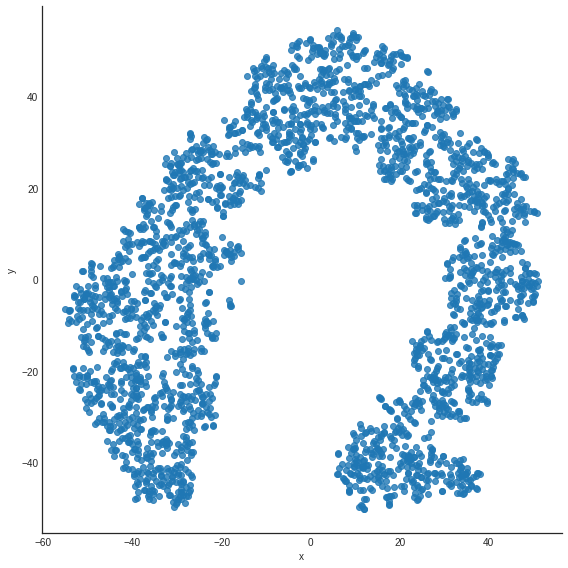

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x','y',data = df, fit_reg = False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([1, 2, 2, ..., 5, 5, 5])

In [ ]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,32.138229,-2.263555,1
때,22.640434,-44.217102,2
보,23.973713,-48.073631,2
고,23.215794,-47.544075,2
지금,24.920176,-45.813717,2
다시,24.570322,-47.335167,2
봐도,26.246811,-46.822659,2
재밌,34.396778,-46.622372,2
어요,34.669720,-45.710670,2
ㅋㅋ,37.206097,-45.657238,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


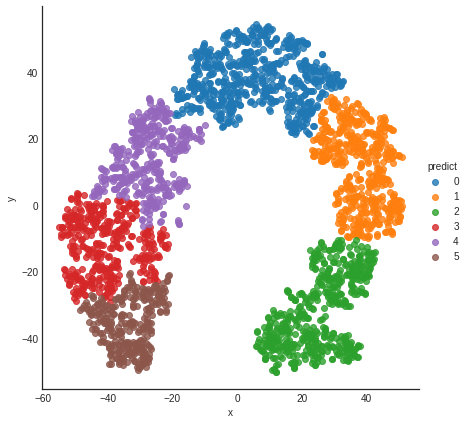

In [ ]:
sns.lmplot('x','y', data = results,fit_reg=False, size=6, hue='predict')
plt.show()

#### average

In [ ]:
avg = AgglomerativeClustering(n_clusters=6,linkage='average')
predict = avg.fit_predict(df)
predict

array([2, 4, 4, ..., 0, 0, 0])

In [ ]:
results = df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,32.138229,-2.263555,2
때,22.640434,-44.217102,4
보,23.973713,-48.073631,4
고,23.215794,-47.544075,4
지금,24.920176,-45.813717,4
다시,24.570322,-47.335167,4
봐도,26.246811,-46.822659,4
재밌,34.396778,-46.622372,4
어요,34.669720,-45.710670,4
ㅋㅋ,37.206097,-45.657238,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


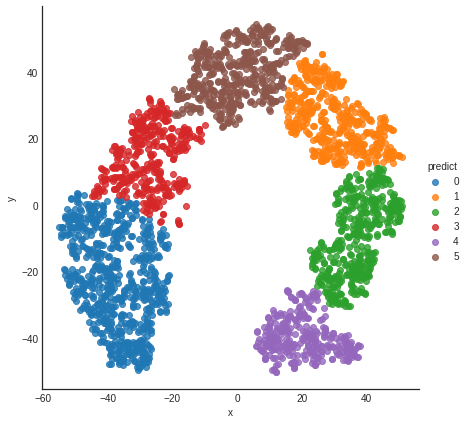

In [ ]:
sns.lmplot('x','y',data = results, fit_reg=False, size=6,hue='predict')
plt.show()

#### complete

In [ ]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
results= df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,32.138229,-2.263555,0
때,22.640434,-44.217102,0
보,23.973713,-48.073631,0
고,23.215794,-47.544075,0
지금,24.920176,-45.813717,0
다시,24.570322,-47.335167,0
봐도,26.246811,-46.822659,0
재밌,34.396778,-46.622372,0
어요,34.669720,-45.710670,0
ㅋㅋ,37.206097,-45.657238,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


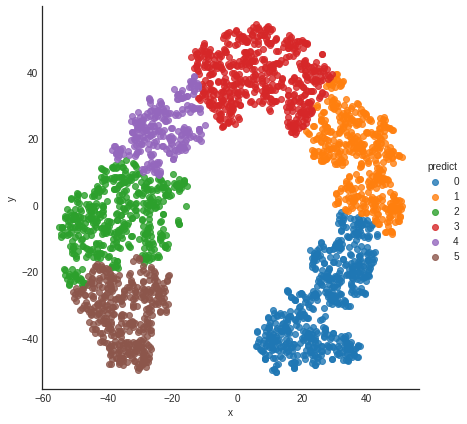

In [ ]:
sns.lmplot('x','y',data = results, fit_reg=False, size=6,hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [ ]:
from scipy.spatial.kdtree import distance_matrix
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,43.015210,46.531951,46.151223,44.144274,45.702554,44.946886,44.416277,43.520803,43.688615,...,75.524365,78.163195,48.647659,80.514673,73.322632,73.455047,72.478366,75.346967,83.565729,78.338748
1,43.015210,0.000000,4.080496,3.376357,2.783235,3.666987,4.449143,11.999873,12.121652,14.636684,...,82.144378,63.682911,79.330356,58.685048,65.155205,51.925630,55.801322,51.619503,62.240766,56.461903
2,46.531951,4.080496,0.000000,0.924593,2.450103,0.949353,2.594592,10.523614,10.953910,13.451206,...,85.557114,65.793546,83.408031,60.077713,67.801829,53.505457,57.843734,52.923327,63.628296,57.894434
3,46.151223,3.376357,0.924593,0.000000,2.428797,1.370544,3.115687,11.218910,11.599733,14.116966,...,84.634545,64.935063,82.659653,59.299583,66.900593,52.702991,56.991260,52.155405,62.851388,57.110853
4,44.144274,2.783235,2.450103,2.428797,0.000000,1.561156,1.666711,9.511042,9.750089,12.286918,...,84.925284,66.220277,81.606658,60.953156,67.841556,54.264121,58.311771,53.844432,64.509099,58.744836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,73.455047,51.925630,53.505457,52.702991,54.264121,54.027256,55.649732,63.737923,63.959259,66.482904,...,49.867449,14.757903,77.524886,7.249954,22.797981,0.000000,8.053845,3.822545,10.677781,4.972126
2635,72.478366,55.801322,57.843734,56.991260,58.311771,58.265665,59.799185,67.753718,67.875504,70.367981,...,41.902525,8.028475,71.789742,10.539586,14.745452,8.053845,0.000000,11.744107,12.259539,9.437959
2636,75.346967,51.619503,52.923327,52.155405,53.844432,53.499692,55.162990,63.282691,63.558835,66.088106,...,53.614520,17.794305,81.027858,7.254310,26.438479,3.822545,11.744107,0.000000,10.779017,5.254444
2637,83.565729,62.240766,63.628296,62.851388,64.509099,64.193413,65.849224,73.971803,74.231937,76.762329,...,50.530408,12.665933,83.800560,3.568016,23.364103,10.677781,12.259539,10.779017,0.000000,5.824130


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

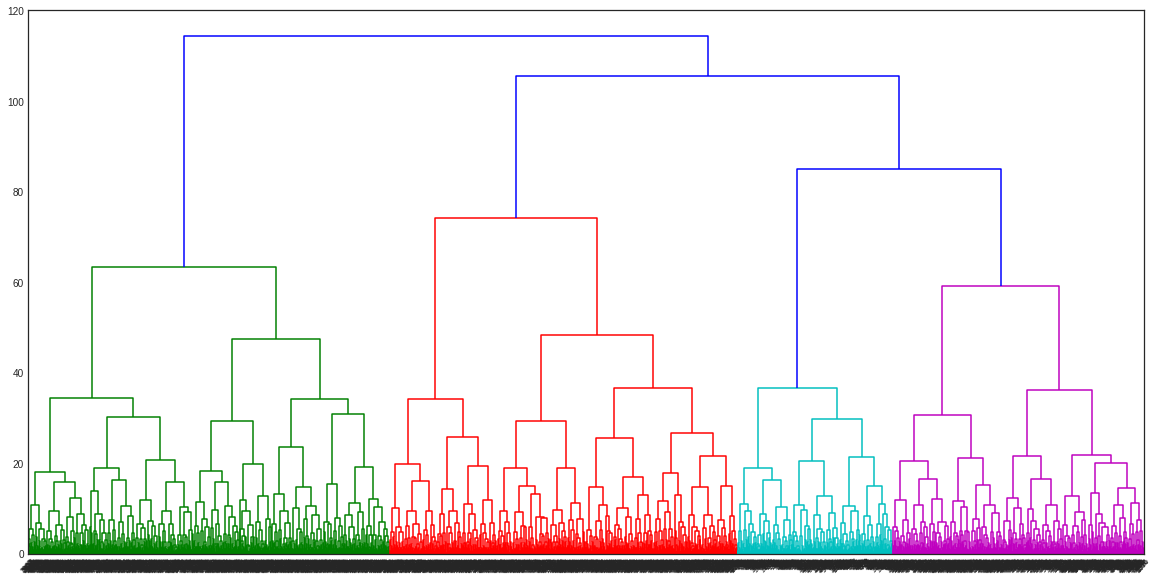

In [ ]:
row_clusters = linkage(distmatrix,method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

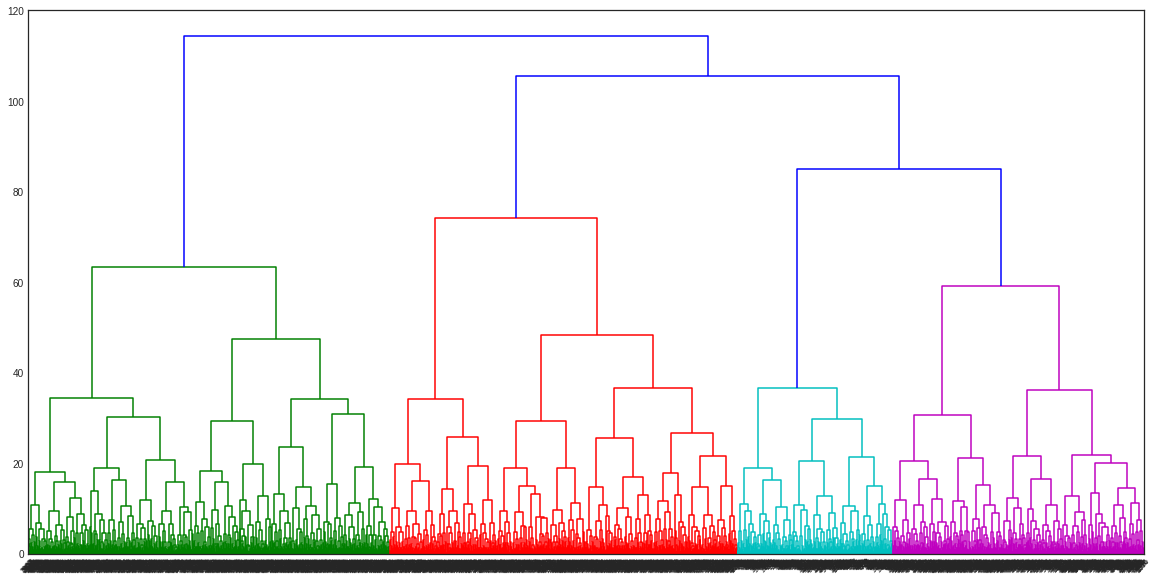

In [ ]:
mergings = linkage(df,method='complete')
plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
results =df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,32.138229,-2.263555,0
때,22.640434,-44.217102,0
보,23.973713,-48.073631,0
고,23.215794,-47.544075,0
지금,24.920176,-45.813717,0
다시,24.570322,-47.335167,0
봐도,26.246811,-46.822659,0
재밌,34.396778,-46.622372,0
어요,34.669720,-45.710670,0
ㅋㅋ,37.206097,-45.657238,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


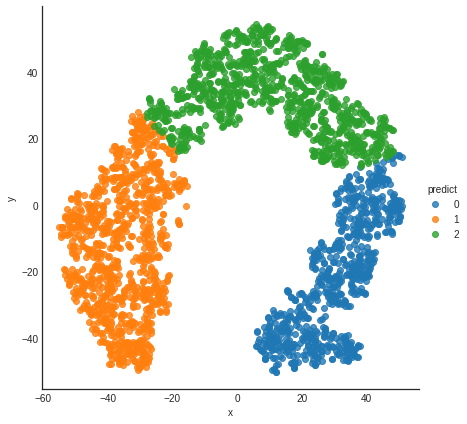

In [ ]:
sns.lmplot('x','y',data =results,fit_reg=False, size=6,hue='predict')
plt.show()

### 클러스터 개수 6

In [ ]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([1, 4, 4, ..., 3, 3, 3], dtype=int32)

In [ ]:
results =df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,32.138229,-2.263555,1
때,22.640434,-44.217102,4
보,23.973713,-48.073631,4
고,23.215794,-47.544075,4
지금,24.920176,-45.813717,4
다시,24.570322,-47.335167,4
봐도,26.246811,-46.822659,4
재밌,34.396778,-46.622372,4
어요,34.669720,-45.710670,4
ㅋㅋ,37.206097,-45.657238,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


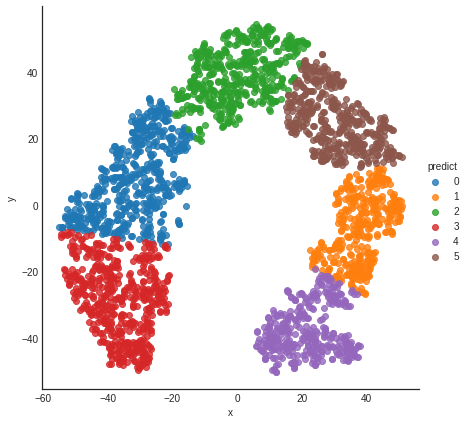

In [ ]:
sns.lmplot('x','y',data =results,fit_reg=False, size=6,hue='predict')
plt.show()